In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers

from tensorflow import keras
keras.__version__

'2.3.0-tf'

In [2]:
from tensorflow.keras.datasets import mnist

help(mnist.load_data)

In [3]:
(train_images_org, train_labels_org), (test_images_org, test_labels_org) \
    = mnist.load_data()

In [4]:
train_images_org.shape

(60000, 28, 28)

In [5]:
digit = train_images_org[2]

In [6]:
print(digit.shape)
print(digit)

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0  

In [7]:
print(train_labels_org[3])

1


help(plt.imshow)

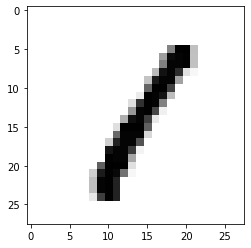

In [8]:
digit = train_images_org[3]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [9]:
train_labels_org[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Take first 1000 records for processing

trainingRecordCount = 60000
testRecordCount = 500

#(train_images_org, train_labels_org), (test_images_org, test_labels_org)

train_images_28_28 = train_images_org[:trainingRecordCount]
train_labels_ordinal = train_labels_org[:trainingRecordCount]

print(train_images_28_28.shape)
print(train_labels_ordinal.shape)

test_images_28_28 = test_images_org[:testRecordCount]
test_labels_ordinal = test_labels_org[:testRecordCount]

print(test_images_28_28.shape)
print(test_labels_ordinal.shape)

In [10]:
train_images_28_28 = train_images_org
train_labels_ordinal = train_labels_org
print(train_images_28_28.shape)
print(train_labels_ordinal.shape)

(60000, 28, 28)
(60000,)


In [17]:
test_images_28_28 = test_images_org
test_labels_ordinal = test_labels_org

print(test_images_28_28.shape) 
print(test_labels_ordinal.shape)

(10000, 28, 28)
(10000,)


## Flatten the images

In [55]:
trainingRecordCount = train_images_28_28.shape[0]
testRecordCount = test_images_28_28.shape[0]

In [56]:
train_images = train_images_28_28.reshape((trainingRecordCount, 28 * 28))
train_images = train_images.astype('float32') / 255
print(train_images.shape)

(60000, 784)


In [57]:
test_images = test_images_28_28.reshape((testRecordCount, 28 * 28))
test_images = test_images.astype('float32') / 255
print(test_images.shape)


(10000, 784)


In [58]:
featuresCount = train_images.shape[1]
featuresCount

784

## Change labels to categorical data

In [59]:
from tensorflow.keras.utils import to_categorical

In [60]:
help(to_categorical)

Help on function to_categorical in module tensorflow.python.keras.utils.np_utils:

to_categorical(y, num_classes=None, dtype='float32')
    Converts a class vector (integers) to binary class matrix.
    
    E.g. for use with categorical_crossentropy.
    
    Usage Example:
    
    >>> y = [0, 1, 2, 3]
    >>> tf.keras.utils.to_categorical(y, num_classes=4)
    array([[1., 0., 0., 0.],
           [0., 1., 0., 0.],
           [0., 0., 1., 0.],
           [0., 0., 0., 1.]], dtype=float32)
    
    Arguments:
        y: class vector to be converted into a matrix
            (integers from 0 to num_classes).
        num_classes: total number of classes.
        dtype: The data type expected by the input. Default: `'float32'`.
    
    Returns:
        A binary matrix representation of the input. The classes axis is placed
        last.



In [61]:
train_labels = to_categorical(train_labels_ordinal)
test_labels = to_categorical(test_labels_ordinal)

In [62]:
train_labels_ordinal[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [63]:
train_labels[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [64]:
train_labels[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [65]:
train_labels.shape

(60000, 10)

## Create models

In [66]:
layer1_neurons = 32
layer2_neurons = train_labels.shape[1]

In [67]:
model = models.Sequential()
model.add(layers.Dense(layer1_neurons, activation = 'relu', 
                       input_shape = (featuresCount, )))

model.add(layers.Dense(layer2_neurons, activation = 'softmax'))

In [68]:
model.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [69]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
None


!pip install pydot

!pip install graphviz

In [70]:
tf.keras.utils.plot_model(
    model, to_file='output/model.png', 
    show_shapes=True, 
    show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=96
)


Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


## Train Model

In [71]:
epochs = 20
batch_size = 64

In [72]:
history = model.fit(train_images, train_labels, 
                    epochs = epochs, batch_size = batch_size)

Epoch 1/20
938/938 [==============================] - 1s 769us/step - loss: 0.4014 - accuracy: 0.8918
Epoch 2/20
938/938 [==============================] - 1s 728us/step - loss: 0.2250 - accuracy: 0.9367
Epoch 3/20
938/938 [==============================] - 1s 743us/step - loss: 0.1782 - accuracy: 0.9507
Epoch 4/20
938/938 [==============================] - 1s 759us/step - loss: 0.1512 - accuracy: 0.9574
Epoch 5/20
938/938 [==============================] - 1s 753us/step - loss: 0.1335 - accuracy: 0.9621
Epoch 6/20
938/938 [==============================] - 1s 741us/step - loss: 0.1209 - accuracy: 0.9655
Epoch 7/20
938/938 [==============================] - 1s 725us/step - loss: 0.1109 - accuracy: 0.9684
Epoch 8/20
938/938 [==============================] - 1s 751us/step - loss: 0.1031 - accuracy: 0.97030s - loss:
Epoch 9/20
938/938 [==============================] - 1s 726us/step - loss: 0.0967 - accuracy: 0.9723
Epoch 10/20
938/938 [==============================] - 1s 744us/step - l

In [73]:
print(history.history.keys())


dict_keys(['loss', 'accuracy'])


In [74]:
history.history

{'loss': [0.40138569474220276,
  0.2250373363494873,
  0.17823663353919983,
  0.15122689306735992,
  0.13347077369689941,
  0.1208997592329979,
  0.11087726801633835,
  0.10310754925012589,
  0.09672785550355911,
  0.09124841541051865,
  0.08723358809947968,
  0.08216670900583267,
  0.07938183844089508,
  0.07577692717313766,
  0.07250086963176727,
  0.07006296515464783,
  0.06834607571363449,
  0.06552819162607193,
  0.06287877261638641,
  0.06115865707397461],
 'accuracy': [0.8917666673660278,
  0.9366999864578247,
  0.9506666660308838,
  0.9573833346366882,
  0.9621166586875916,
  0.9655166864395142,
  0.9684333205223083,
  0.9702500104904175,
  0.9723333120346069,
  0.9735000133514404,
  0.9749166369438171,
  0.9767333269119263,
  0.9768499732017517,
  0.9782166481018066,
  0.9789333343505859,
  0.980400025844574,
  0.980650007724762,
  0.9812833070755005,
  0.9822666645050049,
  0.9823166728019714]}

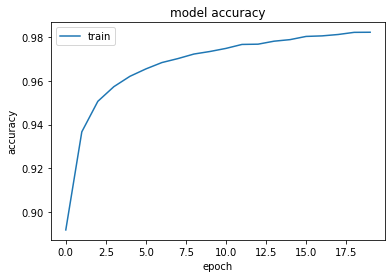

In [75]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


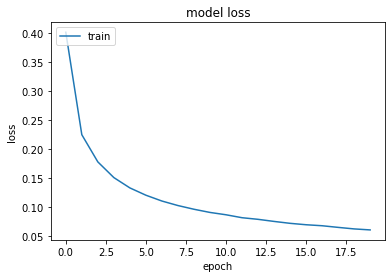

In [76]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [77]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 500us/step - loss: 0.1250 - accuracy: 0.9672


In [78]:
print('test accuracy =', test_acc)

test accuracy = 0.967199981212616


In [79]:
print('test_acc:', test_acc)

test_acc: 0.967199981212616


In [80]:
test_pred = model.predict(test_images)

In [81]:
test_pred[0]

array([5.9941144e-08, 3.5373887e-15, 9.7780763e-08, 3.3144315e-04,
       4.2874639e-15, 9.8314059e-09, 1.8097587e-20, 9.9966741e-01,
       3.4478225e-07, 5.7071060e-07], dtype=float32)

In [82]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

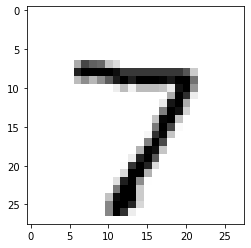

In [83]:
digit = test_images_org[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [84]:
print(test_labels[1])
print(test_pred[1])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[3.5842935e-12 5.3599558e-10 1.0000000e+00 4.3521475e-10 1.7048753e-32
 2.5825477e-11 1.1286630e-13 8.5897870e-22 5.3866200e-11 5.4324677e-24]


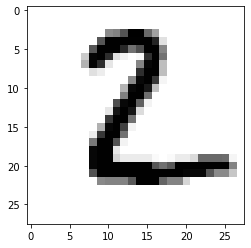

In [85]:
digit = test_images_org[1]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


In [86]:
idx = 99

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[5.9459732e-10 2.7690897e-16 3.1260285e-08 2.7543890e-06 7.7998305e-07
 3.3789738e-11 1.4868272e-13 4.8415008e-05 2.6353189e-06 9.9994540e-01]


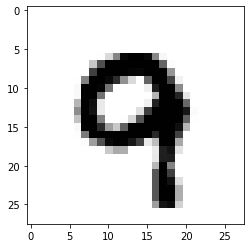

In [87]:
print(test_labels[idx])
print(test_pred[idx])
digit = test_images_org[idx]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## The model accuracy is 96%